In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=13ccbae78a961e9b53201762dacfe077bf9f82e879271455a010d4706b0652cb
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import arff
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statsmodels.api as sm
import patsy
import sklearn.linear_model
import sklearn.ensemble
import sklearn.neural_network
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pandas.plotting import scatter_matrix

import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import libraries
import arff
import pandas as pd

file_name = '/content/drive/MyDrive/test/MM-DataSet.arff'

# Read the ARFF file
with open(file_name, 'r') as f:
    arff_data = arff.load(f)

df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])

df.head()

,wilaya,gender,age,body_surf,weight,married,nbrs_child,blood,HBP,diabete,...,HIV,Ag_HBS,gly,TCA,TP,Fib,Ferr,LDH,FE,CLASS
0,Tlemcen,0,74.0,1.76,68.0,1,8.0,None,0,0,...,None,None,1.09,NaN,NaN,NaN,NaN,201.0,69.0,6
1,Tlemcen,1,67.0,1.63,59.0,1,6.0,O+,0,0,...,0,0,0.96,34.1,77.3,2.71,NaN,327.0,65.0,6
2,Tlemcen,1,88.0,1.47,50.0,1,9.0,O+,1,0,...,0,0,0.73,NaN,NaN,NaN,NaN,349.5,NaN,6
3,SidiBelabes,1,63.0,NaN,65.0,None,NaN,O+,1,1,...,0,0,1.07,33.2,100.0,4.20,346.9,441.6,60.0,6
4,Tlemcen,0,53.0,NaN,NaN,1,5.0,A+,0,0,...,0,0,1.18,13.0,100.0,5.84,NaN,209.0,74.0,4


# **`CLASS variable represents the stage of Multiple Myeloma (MM) cancer, which has been classified into 9 different labels by hematology specialists.`**

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

threshold = 0.3

# Calculate the mean of null values across columns (axis=0)
missing_per_column = df.isnull().mean(axis=0)

# Find the indices of columns that have more than the threshold percentage of missing values
columns_to_drop = missing_per_column[missing_per_column > threshold].index

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

print(f"Dropped {len(columns_to_drop)} columns with more than {threshold*100}% missing values")


Dropped 19 columns with more than 30.0% missing values


In [ ]:
df.isnull().sum()

wilaya            0
gender            0
age               0
body_surf        55
weight           39
married          60
blood            41
HBP               2
diabete           3
tobacco          18
chron_disea      32
hrd_blo_disea    32
asth&bone        20
CBC_WBC           2
CBC_RBC           3
CBC_plats         4
CBC_Hgb           1
CBC_Hct           3
CBC_MCV           4
CBC_MCHC          5
VS               12
plasma_cells     30
Ca                9
creat             3
Urea              4
clair_creat       3
alb               5
a_glob            7
B_glob            7
g_glob            5
prot_rate         9
ost_les          28
SGOT             20
SGPT             21
Ac_Anti_HCV      20
HIV              20
Ag_HBS           20
gly              26
TP               49
CLASS             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wilaya         203 non-null    object 
 1   gender         203 non-null    object 
 2   age            203 non-null    float64
 3   body_surf      148 non-null    float64
 4   weight         164 non-null    float64
 5   married        143 non-null    object 
 6   blood          162 non-null    object 
 7   HBP            201 non-null    object 
 8   diabete        200 non-null    object 
 9   tobacco        185 non-null    object 
 10  chron_disea    171 non-null    object 
 11  hrd_blo_disea  171 non-null    object 
 12  asth&bone      183 non-null    object 
 13  CBC_WBC        201 non-null    float64
 14  CBC_RBC        200 non-null    float64
 15  CBC_plats      199 non-null    float64
 16  CBC_Hgb        202 non-null    float64
 17  CBC_Hct        200 non-null    float64
 18  CBC_MCV   

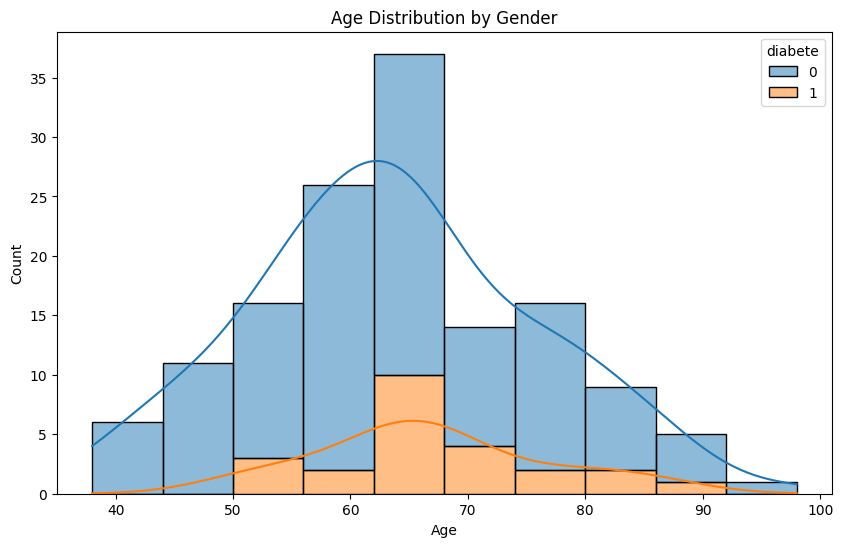

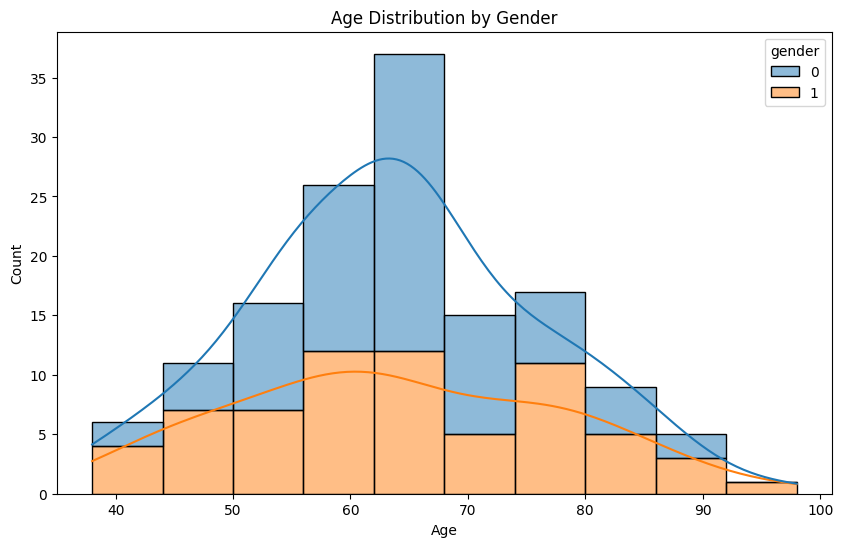

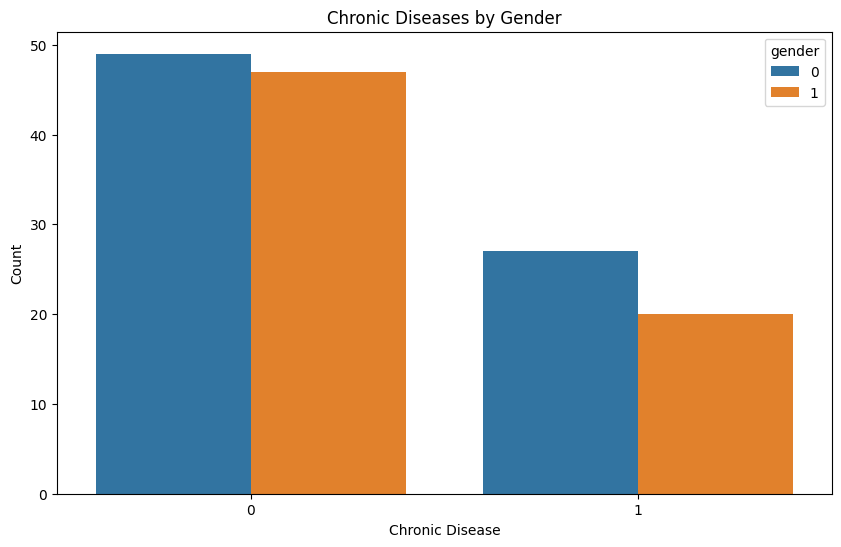

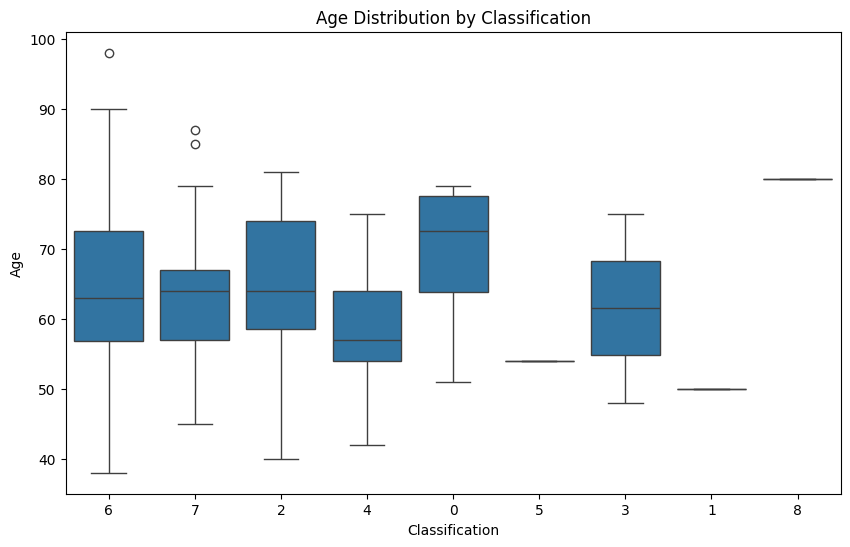

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Clean the data if needed (e.g., handle missing values)
# For simplicity, let's drop rows with missing values in the columns we are interested in
df_clean = df.dropna(subset=['age', 'weight', 'gender', 'chron_disea', 'CLASS'])

# Plot 1: Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='age', hue='diabete', multiple='stack', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Plot 1: Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='age', hue='gender', multiple='stack', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Plot 2: Chronic Diseases by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='chron_disea', hue='gender')
plt.title('Chronic Diseases by Gender')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')
plt.show()

# Plot 3: Age Distribution by Classification
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='CLASS', y='age')
plt.title('Age Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

encoder = LabelEncoder()
for col in ['gender',  'wilaya','blood']:
  # 'married','blood''Ig',,'chain'
    df[col] = encoder.fit_transform(df[col])


In [ ]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']


In [ ]:
# Apply multiple imputation
imputer = IterativeImputer(random_state=42)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)


from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)


score =accuracy_score(y_test,y_pred)
print(acc_log,score)

39.02 0.3902439024390244


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)

acc_svc

56.1

In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

48.78

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

24.39

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

56.1

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

36.59

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
               'decision tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,56.10
3,Random Forest,56.10
1,KNN,48.78
2,Logistic Regression,39.02
5,decision tree,36.59
4,Naive Bayes,24.39


In [ ]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

sfm = SelectFromModel(rf, threshold="median")
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

selected_features = X.columns[sfm.get_support()]
print(f"Selected features: {selected_features}")


Selected features: Index(['age', 'body_surf', 'CBC_WBC', 'CBC_plats', 'CBC_Hct', 'CBC_MCV',
       'CBC_MCHC', 'VS', 'plasma_cells', 'Ca', 'Urea', 'clair_creat', 'alb',
       'a_glob', 'B_glob', 'g_glob', 'prot_rate', 'SGOT', 'SGPT', 'gly'],
      dtype='object')


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('svc', svc),
    ('rf', random_forest),
    ('gnb', gaussian),
    ('knn', knn),
    ('dt', decision_tree)
], voting='hard')

voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
acc_voting = round(voting_clf.score(X_test, y_test) * 100, 2)
print(f"Voting Classifier accuracy: {acc_voting}")


Voting Classifier accuracy: 56.1


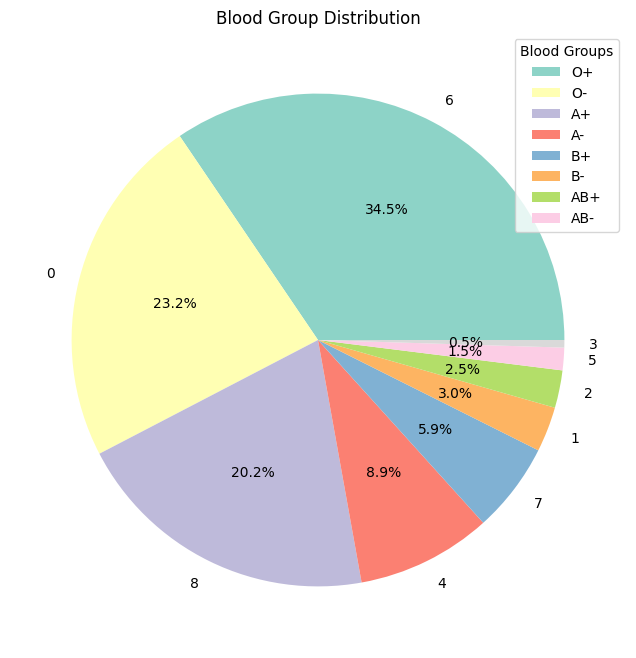

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has been defined earlier
# Drop missing values for the blood column
blood_counts = df['blood'].dropna().value_counts()

plt.figure(figsize=(8, 8))

# Plot the pie chart
blood_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))

# Create a custom legend
labels = ['O+', 'O-', 'A+', 'A-', 'B+', 'B-', 'AB+', 'AB-']
colors = sns.color_palette('Set3')

plt.legend(labels, title="Blood Groups", loc="upper right")

plt.title('Blood Group Distribution')
plt.ylabel('')

plt.show()


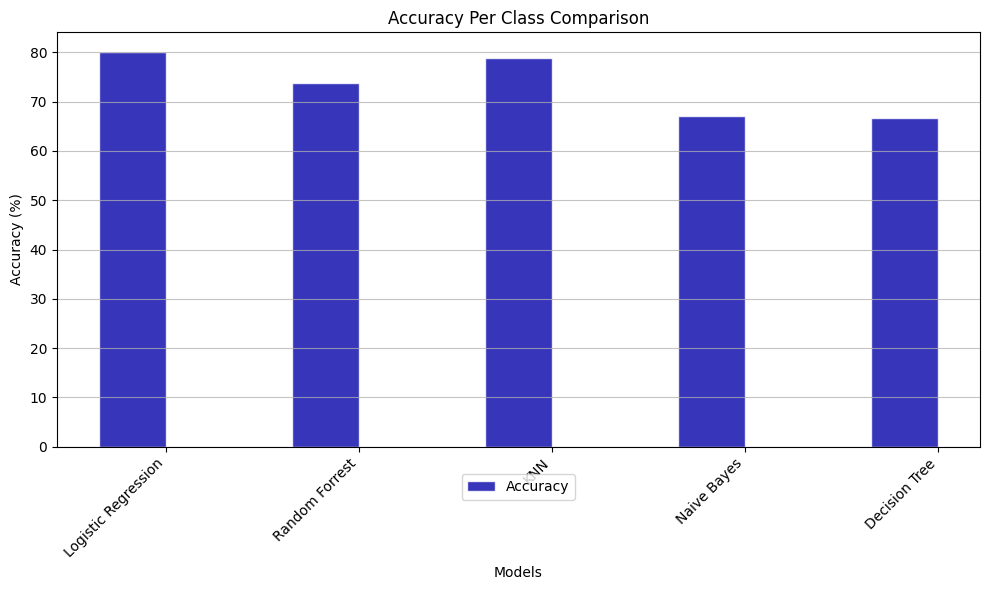

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_accuracies is your data structure
model_accuracies = {
    "Logistic Regression": 80.05,
    "Random Forrest": 73.77,
    "KNN": 78.87,
    "Naive Bayes": 66.99,
    "Decision Tree": 66.62
}

# Prepare data for plotting
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)  # Adjust figure size and DPI for better resolution

# Create bar chart with adjusted width for better spacing
bar_width = 0.35  # Adjust width as needed
index = np.arange(len(models))  # Position of bars
opacity = 0.8  # Opacity of bars

# Plot bars
rects1 = ax.bar(index, accuracies, bar_width, alpha=opacity, color='#0504aa', edgecolor='white', label='Accuracy')

# Add grid and axis labels
ax.grid(axis='y', alpha=0.75)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Per Class Comparison')

# Rotate x-axis labels for better readability
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()


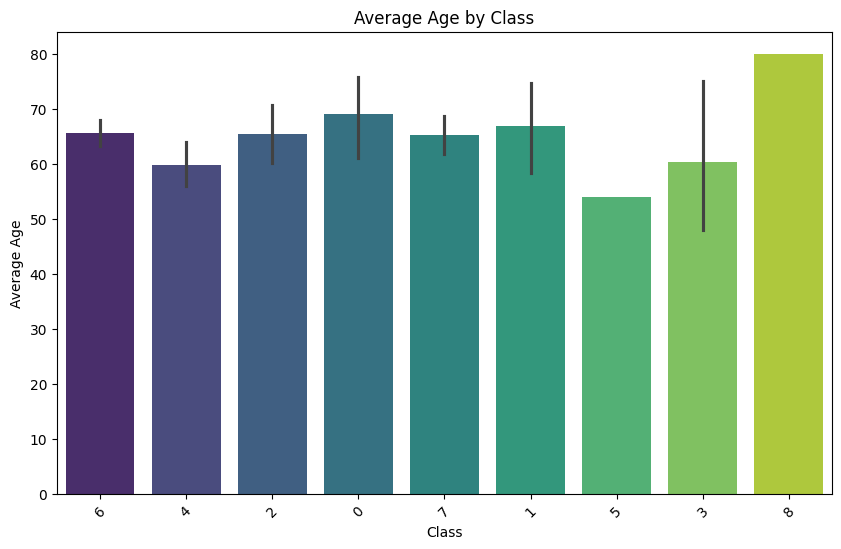

In [ ]:
# Drop missing values for age and class
age_class = df[['age', 'CLASS']].dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x='CLASS', y='age', data=age_class, palette='viridis')
plt.title('Average Age by Class')
plt.xlabel('Class')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()


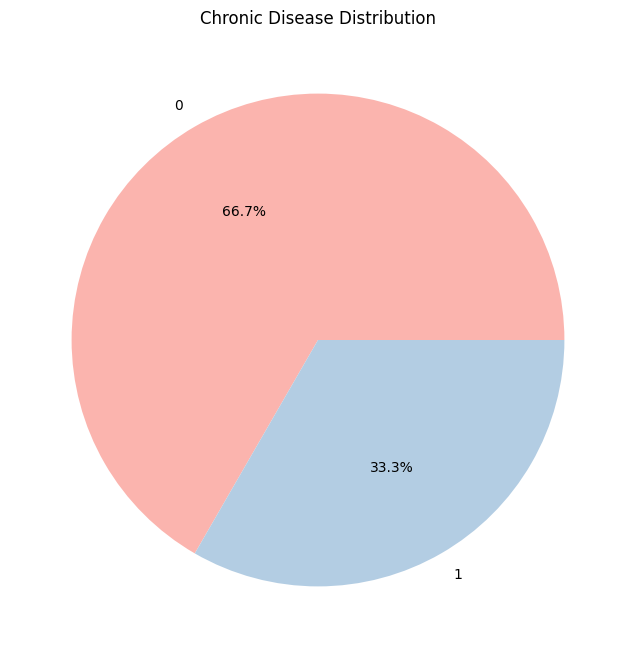

In [ ]:
# Drop missing values for the chronic disease column
chron_disea_counts = df['chron_disea'].dropna().value_counts()

plt.figure(figsize=(8, 8))
chron_disea_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Pastel1'))
plt.title('Chronic Disease Distribution')
plt.ylabel('')
plt.show()


In [ ]:
# Drop 'HIV' and 'Ac_Anti_HCV' columns
df_encoded = df.drop(['HIV', 'Ac_Anti_HCV'], axis=1)
df=df_encoded

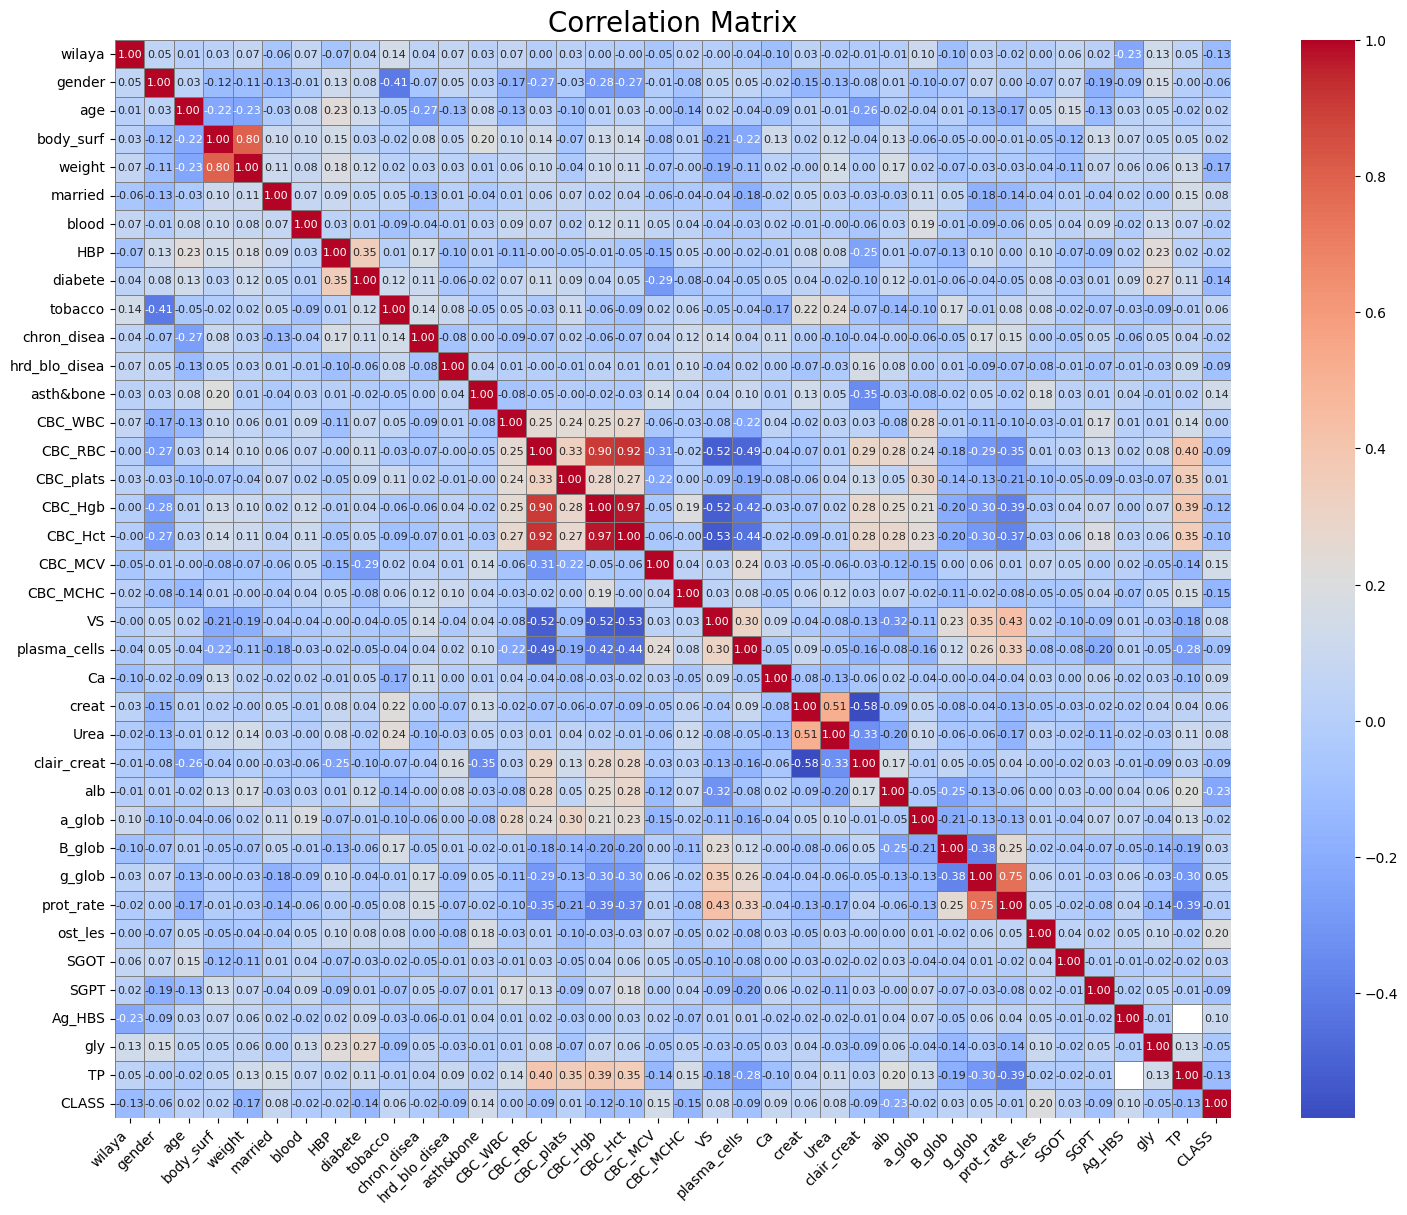

In [ ]:

# Assuming you already have the df DataFrame loaded
plt.figure(figsize=(18, 14))  # Increase the figure size for better readability

# Use a more distinct color palette and adjust the font size
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8}, linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

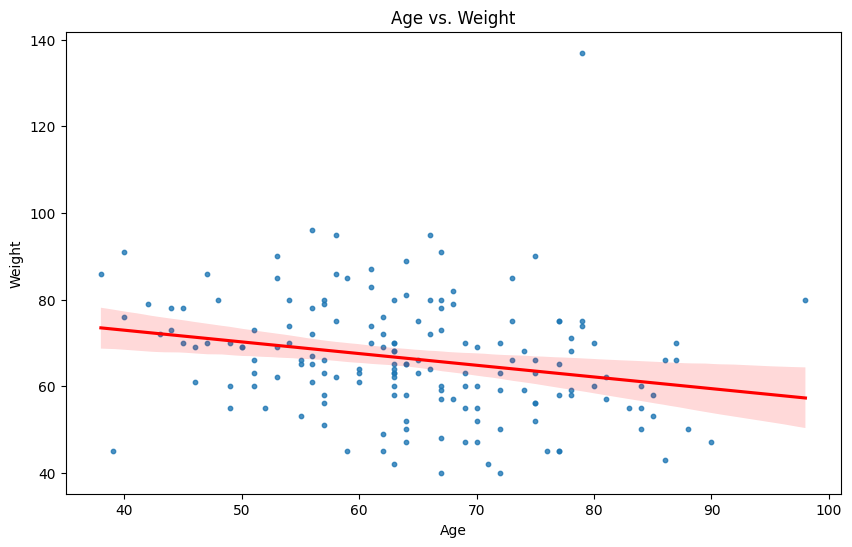

In [ ]:
# Scatter plot with regression line for age vs. weight
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='weight', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Age vs. Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()


In [ ]:
# Pairplot for selected numerical columns with hue
selected_columns = ['age', 'weight', 'CBC_WBC', 'CBC_RBC', 'CBC_Hgb']
sns.pairplot(df[selected_columns + ['gender']].dropna(), hue='gender', palette='viridis')
plt.suptitle('Pairplot of Selected Numerical Columns by Gender', y=1.02)
plt.show()


In [ ]:
# Heatmap for missing data
plt.figure(figsize=(18, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

encoder = LabelEncoder()
for col in ['gender',  'wilaya','blood']:
  # 'married','blood''Ig',,'chain'
    df[col] = encoder.fit_transform(df[col])
